# Random Forest - Árvores de Regressão

### Descrição do dataset
year: 2016 for all data points

month: number for month of the year

day: number for day of the year

week: day of the week as a character string

temp_2: max temperature 2 days prior

temp_1: max temperature 1 day prior

average: historical average max temperature

actual: max temperature measurement

friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

### Objetivo
Construir um modelo de árvore de regressão para prever a temperatura máxima do dia

In [1]:
# Importando os módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Carregando o dataset
tempo = pd.read_csv('temps.csv')
tempo.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### Análise e Pré-processamento

In [3]:
# Elimando as colunas que não farão parte do modelo de previsão
del tempo['forecast_noaa']
del tempo['forecast_acc']
del tempo['forecast_under']

In [4]:
# Verificando o número de observações e variáveis do dataset
tempo.shape

(348, 9)

In [5]:
# Verificando se há dados missing no dataset
tempo.isnull().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

In [6]:
# Eliminando as linhas com valores missing (se necessário)
tempo.dropna(inplace=True)

In [7]:
# Resumo estatístico das variáveis 
tempo.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


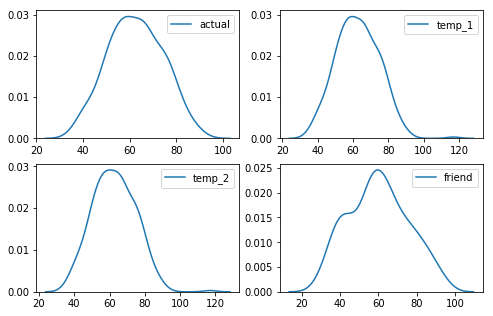

In [8]:
# Analisando a distribuição (densidade) das variáveis
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
sns.kdeplot(tempo['actual'])
plt.subplot(3,2,2)
sns.kdeplot(tempo['temp_1'])
plt.subplot(3,2,3)
sns.kdeplot(tempo['temp_2'])
plt.subplot(3,2,4)
sns.kdeplot(tempo['friend'])

In [9]:
# One-Hot Encoding (transformando a variável categórica
tempo = pd.get_dummies(tempo)

In [10]:
tempo.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [11]:
tempo.shape

(348, 15)

In [12]:
# Separando os dados em variáveis de entrada e alvo (usando numpy)
alvo_temp = np.array(tempo['actual'])
alvo_temp

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

In [13]:
# Eliminando a variável alvo do dataset
tempo= tempo.drop('actual', axis = 1)

In [14]:
tempo.head()

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,41,0,0,0,0,0,1,0


In [15]:
# Armazenando os nomes das variáveis (labels) para usar depois
nome_atributos = list(tempo.columns)
nome_atributos

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [16]:
# Convertendo as variáveis de entrada em um array
tempo_m = np.array(tempo)
tempo_m

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [17]:
tempo_m.shape

(348, 14)

### Criando os arquivos de treinamento e teste

In [18]:
# Carregando o pacote para particionar os dados (módulo sklearn)
from sklearn.model_selection import train_test_split

In [19]:
# Construindo os conjuntos de dados de treino e teste
treino, teste, treino_alvo, teste_alvo = train_test_split(tempo_m, 
                                                          alvo_temp, 
                                                          test_size = 0.3,
                                                          random_state = 42)

In [20]:
print('Treino: ', treino.shape)
print('Treino alvo: ', treino_alvo.shape)
print('Teste: ', teste.shape)
print('Teste alvo: ', teste_alvo.shape)

Treino:  (243, 14)
Treino alvo:  (243,)
Teste:  (105, 14)
Teste alvo:  (105,)


### Construindo o modelo de regressão

In [21]:
# Carregando o pacote para construir o modelo
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Criando uma instância com 100 árvores de decisão
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [23]:
# Treinando o modelo (dados de treino)
rf.fit(treino, treino_alvo)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [24]:
# Executando as previsões (dados de teste)
previsoes = rf.predict(teste)

In [25]:
# Calculando o erro absoluto
erro = abs(previsoes - teste_alvo).mean()
erro

3.8665428571428575

In [26]:
# Mean Absolute Percentage Error
mape = 100 * (erro / teste_alvo).mean()
mape

6.427190048951584

In [27]:
# Calculando a acurária do modelo
acuracia = 100 - mape
acuracia

93.57280995104841

In [28]:
# Analisando a relevância das variáveis na construção do modelo
rf.feature_importances_

array([0.        , 0.01345684, 0.02311037, 0.02684859, 0.66190344,
       0.22477117, 0.02687771, 0.00533322, 0.00216659, 0.00494649,
       0.00269443, 0.00140958, 0.00360392, 0.00287765])

In [29]:
importancia = list(rf.feature_importances_)

In [30]:
valores_x = list(range(len(importancia)))
valores_x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Text(0.5, 1.0, 'Importância das Variáveis')

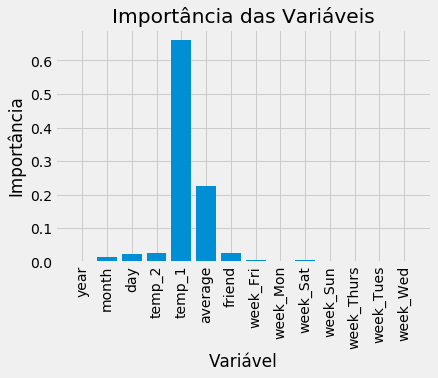

In [31]:
# Visualizando a importância das variáveis
plt.style.use('fivethirtyeight')
plt.bar(valores_x, importancia, orientation = 'vertical')
plt.xticks(valores_x, nome_atributos, rotation='vertical')
plt.ylabel('Importância'); plt.xlabel('Variável')
plt.title('Importância das Variáveis')

### Construindo a segunda versão do modelo

In [32]:
# Criando uma nova versão do modelo (nova instância)
rf2 = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [33]:
# Extraindo as duas variáveis mais importantes
indices_importantes = [nome_atributos.index('temp_1'), nome_atributos.index('average')]
indices_importantes

[4, 5]

In [34]:
# Conjunto de treino 
treino_i = treino[:, indices_importantes]

In [35]:
# Conjunto de teste
teste_i = teste[:, indices_importantes]

In [36]:
# Treinando o modelo
rf2.fit(treino_i, treino_alvo)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [37]:
# Testando o modelo (fazendo previsões)
previsoes = rf2.predict(teste_i)

In [38]:
# Erro absoluto
erro = abs(previsoes - teste_alvo).mean()
erro

3.9688911564625853

In [39]:
# MAPE
mape = 100 * (erro / teste_alvo).mean()
mape

6.597319282020775

In [40]:
# Acurácia
acuracia = 100 - mape
acuracia

93.40268071797922